In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter("ignore")
import sklearn.metrics

In [3]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
71,15726358,Female,24,27000,0


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [7]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

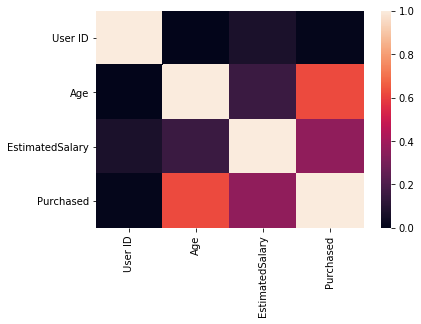

In [8]:
corr=dataset.corr()
sb.heatmap(corr)

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
# dataset.replace(["YearsExperience"],1,inplace=True)
# dataset.head()

In [12]:
dataset.shape

(400, 5)

In [13]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.20,random_state=0)

In [14]:
train.shape,test.shape

((320, 5), (80, 5))

In [15]:
test.to_csv('test.csv',index=False,encoding='utf-8')

In [16]:
#split the train data into train and cross validation
train_data,cv_data=train_test_split(train,test_size=0.20,random_state=0)

In [17]:
train_data.shape,cv_data.shape

((256, 5), (64, 5))

In [18]:
x_train=train_data.iloc[:,[2,3]].values
y_train=train_data.iloc[:,4].values

In [19]:
x_train.shape

(256, 2)

In [20]:
x_cv=cv_data.iloc[:,[2,3]].values
y_cv=cv_data.iloc[:,4].values

In [21]:
# y_cv

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [23]:
x_cv=sc.fit_transform(x_cv)

In [24]:
#fitting the LogisticRegression to the training set 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
# from sklearn.svm import SVC
# classifier=SVC(kernel='rbf')
#that the classifier learns corr between x_train and y_train
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#predicting the train set result
y_pred=classifier.predict(x_train)
dataset=pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
dataset.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [26]:
x_cv.shape

(64, 2)

In [27]:
type(y_cv)

numpy.ndarray

In [28]:
#predicting the cross validation result
# x_cv=x_cv.reshape(x_cv(-1,1))
y_predict=classifier.predict(x_cv)
dataset=pd.DataFrame({'Actual':y_cv,'Predicted':y_predict})
dataset.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,0,0


In [29]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)

In [30]:
print(cm)

[[161   0]
 [  0  95]]


In [31]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_cv,y_predict)

In [32]:
print(cm1)

[[33  5]
 [ 5 21]]


In [33]:
#check accuracy for X train data
Acc_Train=sklearn.metrics.balanced_accuracy_score(y_pred,y_train)*100
print(Acc_Train)

100.0


In [34]:
#check accuracy for X train data
# Acc_Train=sklearn.metrics.accuracy_score(y_pred,y_train)*100
# print(Acc_Train)

In [35]:
#check accuracy for x_cv data
Acc_cv=sklearn.metrics.accuracy_score(y_predict,y_cv)*100
print(Acc_cv)

84.375


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


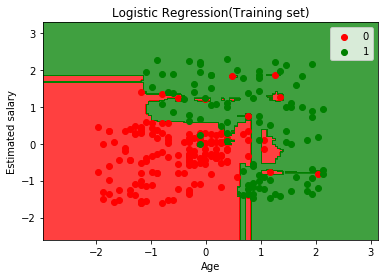

In [36]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


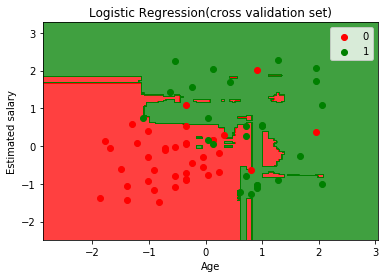

In [37]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_cv,y_cv
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(cross validation set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()


 ROC curve 



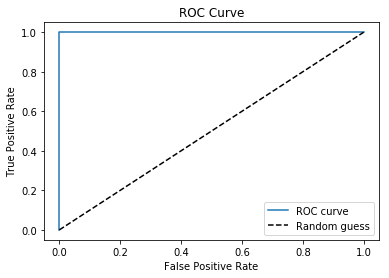

In [38]:
from sklearn.metrics import roc_curve, auc
print("\n ROC curve \n")
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
# plt.xlim([-0.02, 1])
# plt.ylim([0, 1.02])
plt.legend()
plt.show()


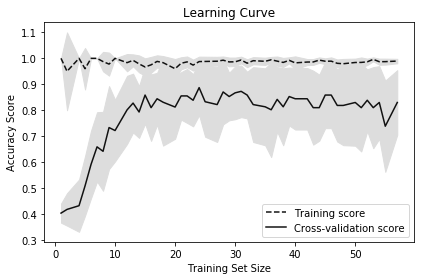

In [41]:
from sklearn.model_selection import learning_curve
class Training_Random_Forest():
    def visualization_learning_curve(self,X,y,classifier):
        train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

        # Create means and standard deviations of training set scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        # Create means and standard deviations of test set scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Draw lines
        plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
        plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

        # Draw bands
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

        # Create plot
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show() 
        
def main():
# instantiation of class
    obj = Training_Random_Forest()

    obj.visualization_learning_curve(x_cv,y_cv,classifier)

if __name__ == '__main__':
    main()

In [ ]:
#pickle file
import pickle
fileobject=open("Train.pkl","wb")
pickle.dump(classifier,fileobject)
pickle.dump(sc,fileobject)
fileobject.close()